## Data Analysis and Visualization

### Importing Libraries and reading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy as hc
from sklearn.model_selection import train_test_split
import scipy
%matplotlib inline

#sklearn imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
data = pd.read_csv('data.csv')
data.drop('id',inplace=True,axis=1)

### Analysis and Visualization

#### Checking for Null Values

In [4]:
data.isnull().sum().sum()

0

There is no null value in the Dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Columns: 210 entries, label to 208
dtypes: float64(209), int64(1)
memory usage: 4.1 MB


In [6]:
data.describe()

label            0            1            2            3  \
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000   
mean      0.438515   263.858467   249.565581   241.139381   235.613046   
std       0.496301     5.346743     5.761911     5.482191     5.655436   
min       0.000000   240.968402   229.185207   221.395063   211.124092   
25%       0.000000   260.227368   245.313889   237.388160   231.405920   
50%       0.000000   264.245592   250.193412   241.869822   236.048860   
75%       1.000000   267.682001   254.206154   245.115687   240.084130   
max       1.000000   277.363158   262.775059   253.245445   249.976055   

                 4            5            6            7            8  ...  \
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000  ...   
mean    228.193434   224.922449   219.470207   215.270775   211.506226  ...   
std       4.788820     5.096269     4.786237     4.553984     4.560689  ...   
min     207.111430   202.490693   196.297022   193.872360   188.616166  ...   
25%     224.990217   221.635336   215.539817   211.984007   208.205043  ...   
50%     228.427120   225.511937   219.907681   215.872438   211.966966  ...   
75%     231.546032   228.366108   223.058662   218.710731   215.029192  ...   
max     241.317632   237.321869   231.914126   226.066447   223.648738  ...   

               199          200          201          202          203  \
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000   
mean     84.303004    84.347031    84.644634    84.663325    84.577945   
std       2.606156     2.883908     2.880254     3.033595     3.593346   
min      75.454954    75.079185    75.456739    75.342542    72.704746   
25%      82.307932    82.190782    82.685668    82.587367    82.090678   
50%      84.152544    84.242385    84.243054    84.275428    84.461679   
75%      86.168171    86.316604    86.614666    86.782236    87.105773   
max      93.754665    94.253758    94.639466    96.244714    97.235327   

               204          205          206          207          208  
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000  
mean     84.899270    85.221351    85.632018    85.980511    87.053154  
std       3.449836     4.389247     4.511155     5.430607     7.119943  
min      75.120139    72.111638    74.903141    69.835757    69.127327  
25%      82.190294    81.820642    82.449924    82.345476    82.256794  
50%      84.306905    84.640620    84.512256    84.989439    85.146863  
75%      87.366998    88.200577    88.581786    89.468865    90.877441  
max      96.189959    98.843656   101.237562   102.786316   107.285584  

[8 rows x 210 columns]

In [39]:
data.values.max()

277.3631584335185

The maximum value in the dataframe is 277.36.

In [41]:
data.iloc[:,1:].values.min()

69.12732662132476

The maximum value in the dataframe is 69.12.

The data is a very high dimensional data and only has encoded numerical features. 

#### Analysing the Label

In [7]:
data['label'].value_counts()

0    1452
1    1134
Name: label, dtype: int64

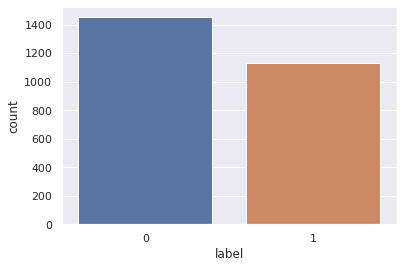

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=data)

So we can see, the number of observations with Label 0 are 1452. The number of observations with Label 1 are 1132. 

#### Analyzing the correlation among the columns

label         0         1         2         3         4         5  \
label  1.000000 -0.214390 -0.137295 -0.244260 -0.180951 -0.127465 -0.047311   
0     -0.214390  1.000000  0.695859  0.689697  0.599823  0.587383  0.470095   
1     -0.137295  0.695859  1.000000  0.797080  0.816325  0.783611  0.711542   
2     -0.244260  0.689697  0.797080  1.000000  0.790122  0.791199  0.651052   
3     -0.180951  0.599823  0.816325  0.790122  1.000000  0.834026  0.817625   
...         ...       ...       ...       ...       ...       ...       ...   
204   -0.045389  0.166522  0.174749  0.180571  0.118556  0.139015  0.083237   
205   -0.038511  0.116929  0.126716  0.125879  0.081339  0.087542  0.028149   
206   -0.049073  0.103589  0.103367  0.111866  0.035924  0.041477 -0.022469   
207   -0.019459  0.062530  0.036656  0.051633 -0.022506 -0.005163 -0.072765   
208   -0.018907  0.036523 -0.004905  0.003376 -0.079234 -0.067007 -0.124240   

              6         7         8  ...       199       200       201  \
label -0.099566 -0.150394 -0.240856  ... -0.076589 -0.082638 -0.108919   
0      0.491291  0.484587  0.508609  ...  0.245578  0.215627  0.173224   
1      0.727615  0.698595  0.681418  ...  0.293321  0.225057  0.184807   
2      0.652954  0.629746  0.614294  ...  0.304254  0.261938  0.196358   
3      0.792240  0.767090  0.749128  ...  0.255525  0.192235  0.132034   
...         ...       ...       ...  ...       ...       ...       ...   
204    0.100785  0.072494  0.097372  ...  0.716636  0.658846  0.729232   
205    0.044441  0.023604  0.039439  ...  0.633541  0.589848  0.626988   
206    0.001814 -0.025575 -0.004667  ...  0.670639  0.642831  0.668563   
207   -0.044467 -0.058103 -0.043265  ...  0.569766  0.540821  0.585369   
208   -0.111330 -0.120240 -0.108665  ...  0.577770  0.555119  0.617578   

            202       203       204       205       206       207       208  
label -0.082026 -0.042087 -0.045389 -0.038511 -0.049073 -0.019459 -0.018907  
0      0.163326  0.200866  0.166522  0.116929  0.103589  0.062530  0.036523  
1      0.187893  0.230196  0.174749  0.126716  0.103367  0.036656 -0.004905  
2      0.199648  0.235243  0.180571  0.125879  0.111866  0.051633  0.003376  
3      0.148108  0.179616  0.118556  0.081339  0.035924 -0.022506 -0.079234  
...         ...       ...       ...       ...       ...       ...       ...  
204    0.723253  0.648262  1.000000  0.691428  0.771745  0.697834  0.682575  
205    0.681796  0.596729  0.691428  1.000000  0.724342  0.620703  0.715181  
206    0.702251  0.676163  0.771745  0.724342  1.000000  0.717759  0.772145  
207    0.613296  0.559173  0.697834  0.620703  0.717759  1.000000  0.697662  
208    0.629435  0.582203  0.682575  0.715181  0.772145  0.697662  1.000000  

[210 rows x 210 columns]

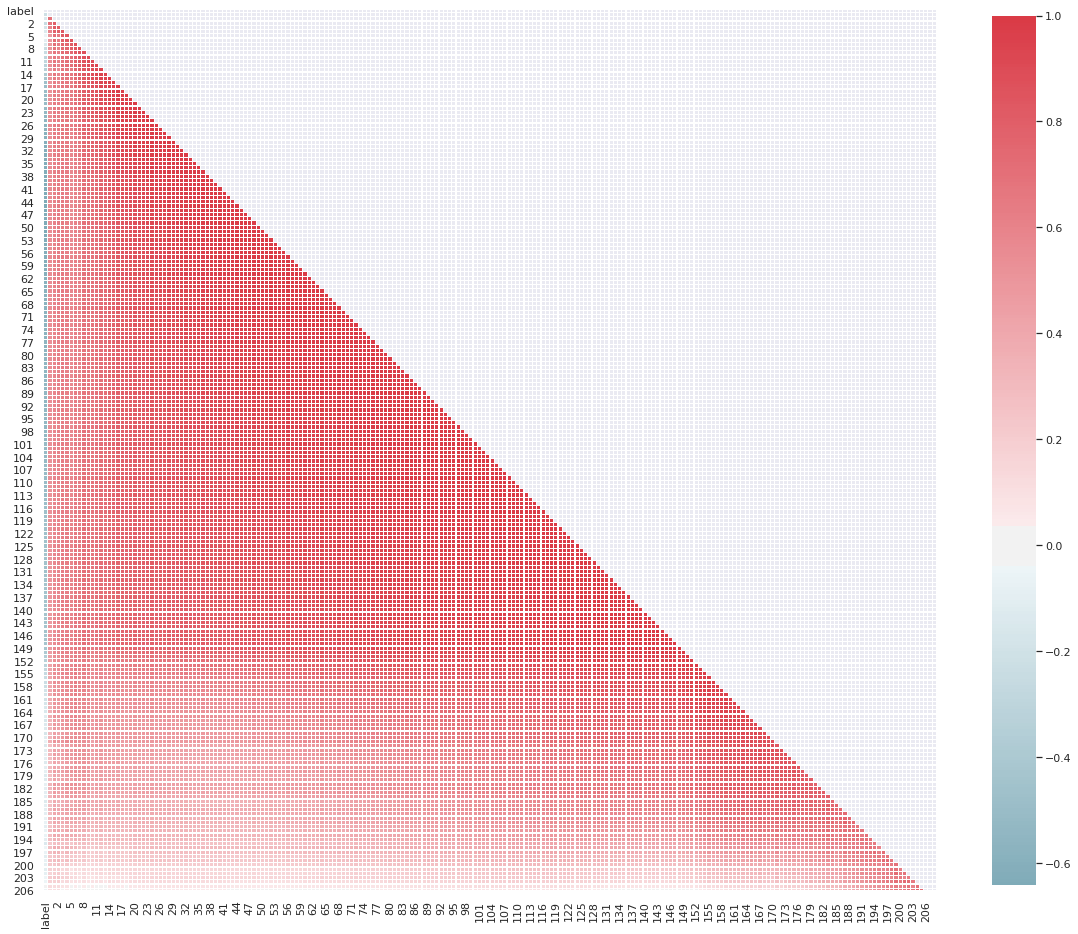

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .8})
display(corr)

As we can see there are many features which are highy correlated with each other. Let us check the multicollinearity using a dendogram to get a better a feel of correlation among features.


#### Dendogram

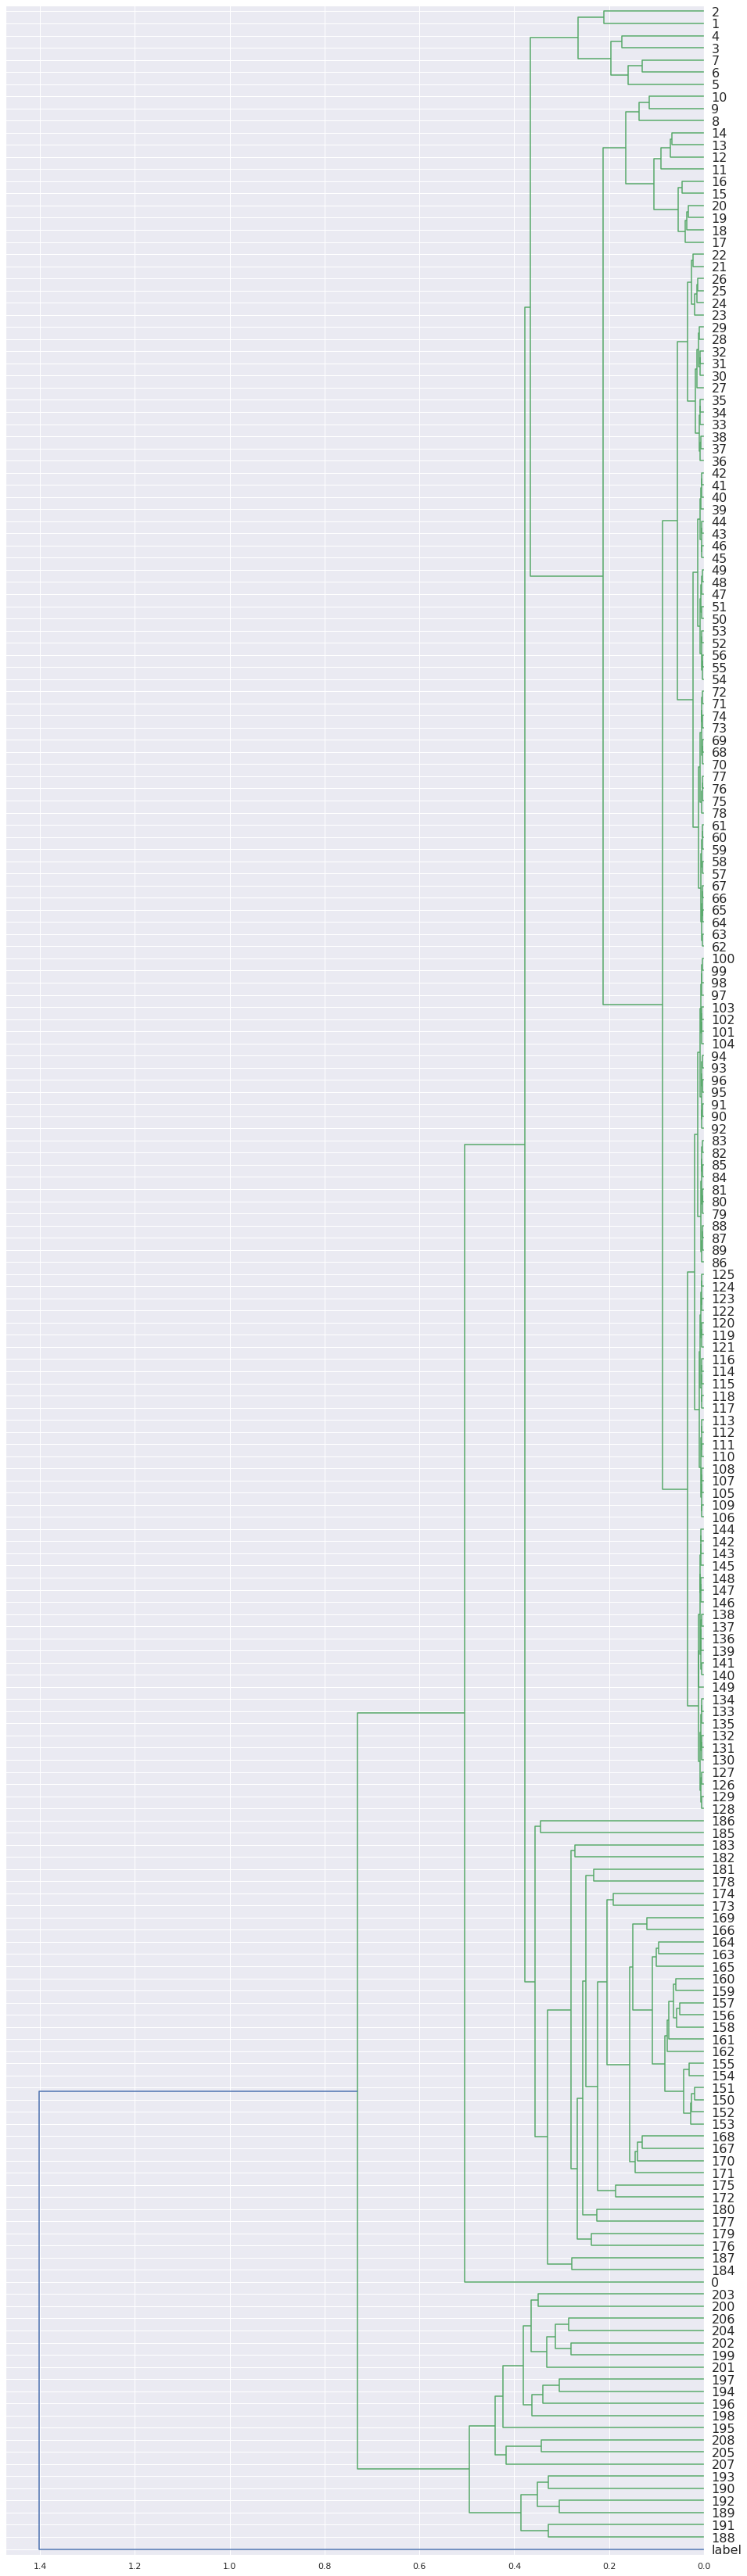

In [10]:
corr = np.round(scipy.stats.spearmanr(data).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,60))
dendrogram = hc.dendrogram(z, labels=data.columns, orientation='left', leaf_font_size=16)
plt.show()

Each joining of two features is represented on the graph by the splitting of a horizontal line into two horizontal lines. The horizontal position of the split, shown by the short vertical bar, gives the distance between the two features. 

As we can see there is very high multicollinearity among features.

#### Analyzing the distribution of each column with respect to the Label

/home/shivangmathur/anaconda3/envs/fastai_ml_1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



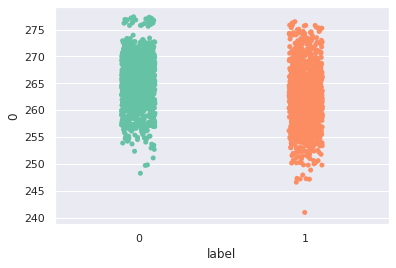

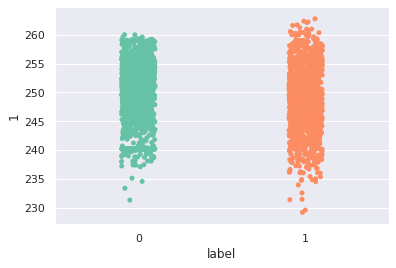

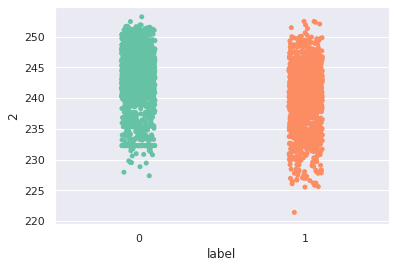

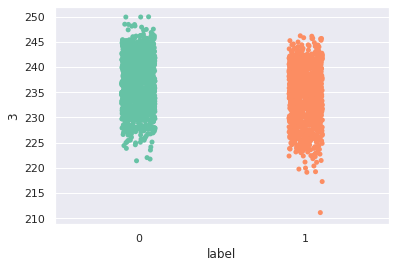

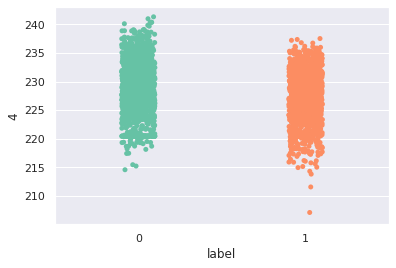

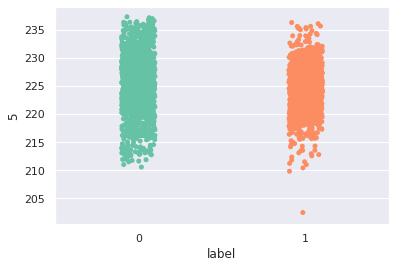

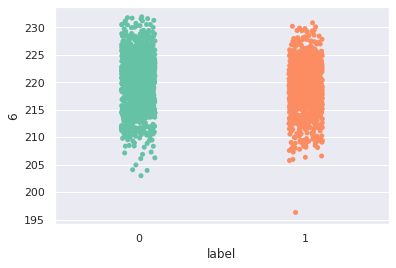

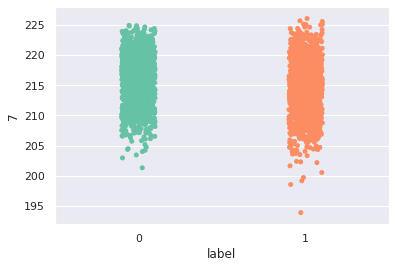

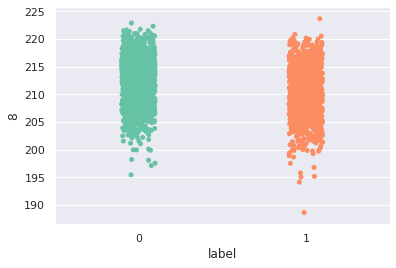

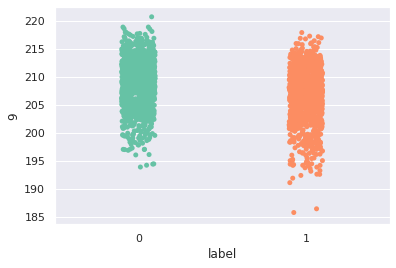

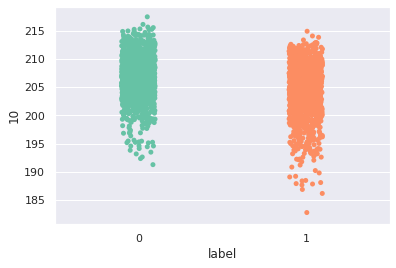

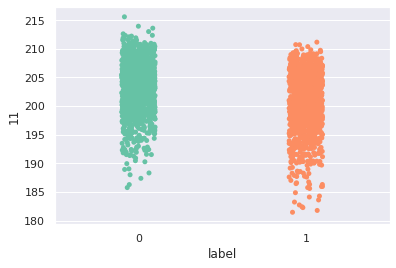

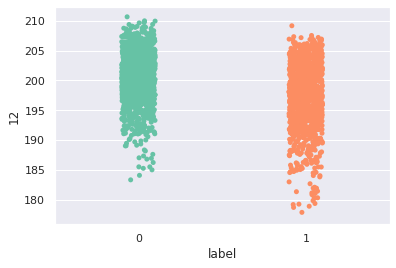

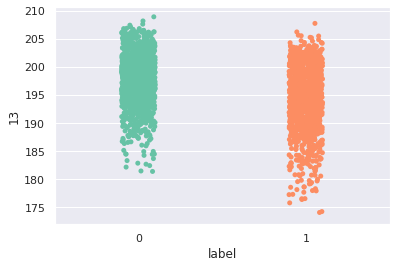

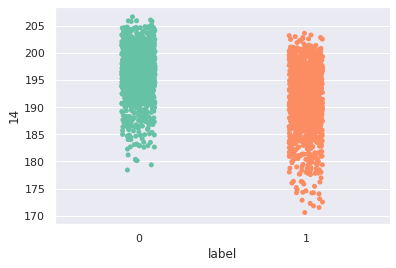

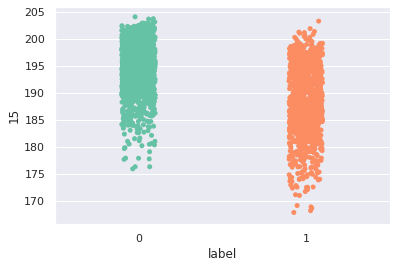

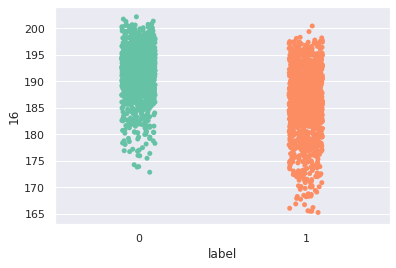

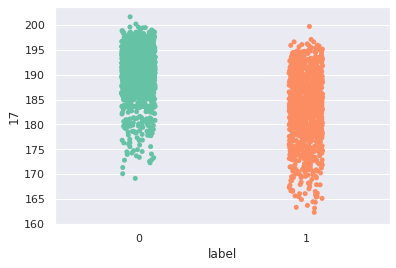

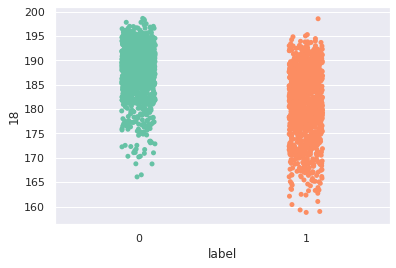

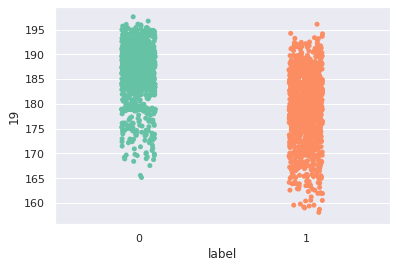

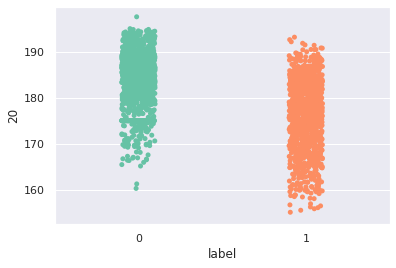

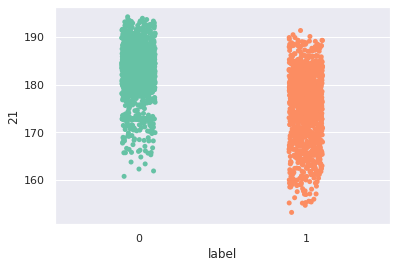

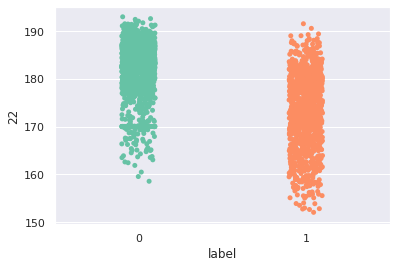

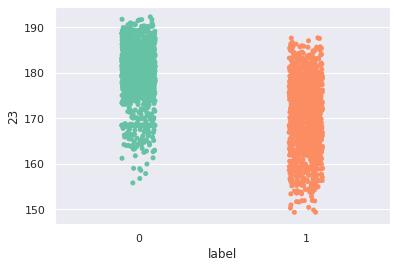

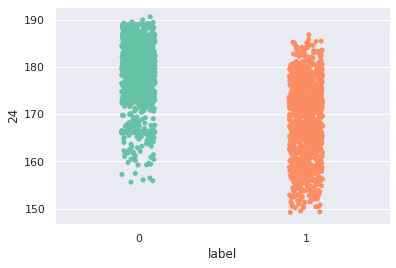

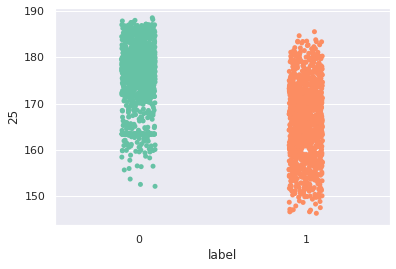

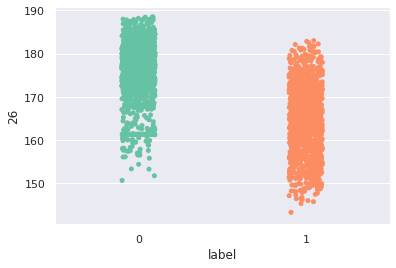

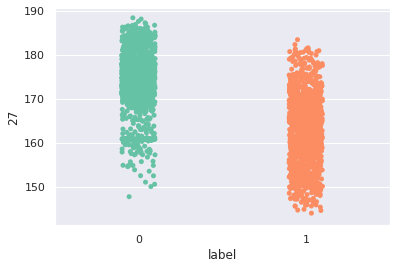

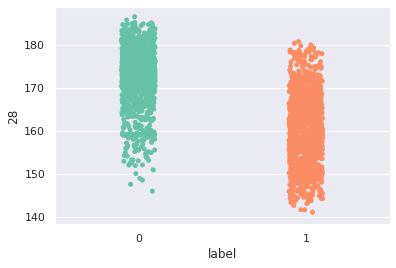

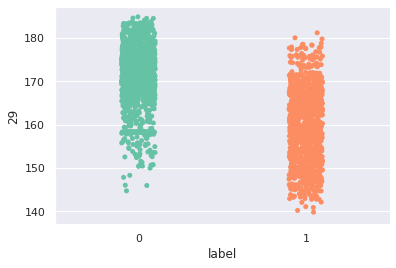

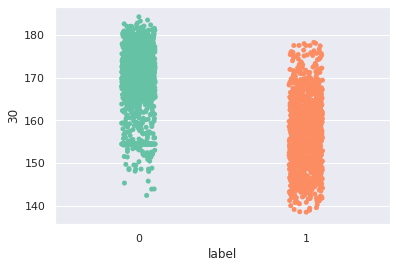

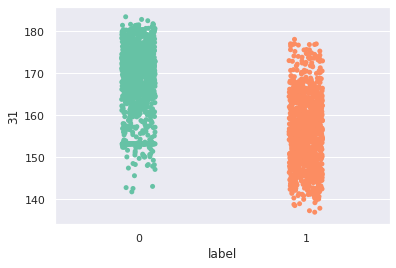

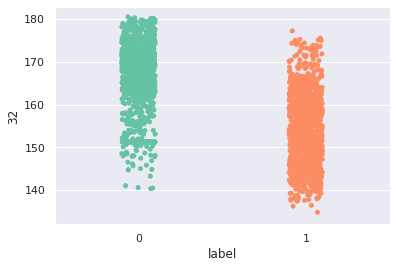

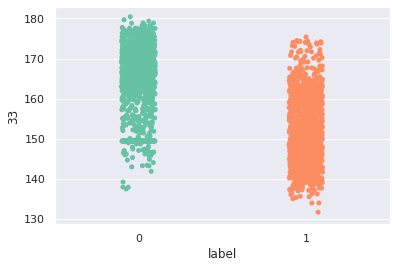

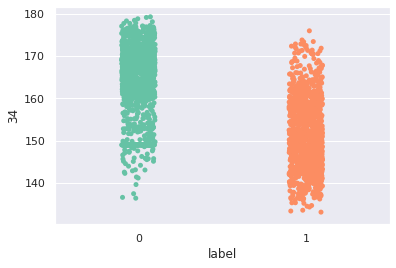

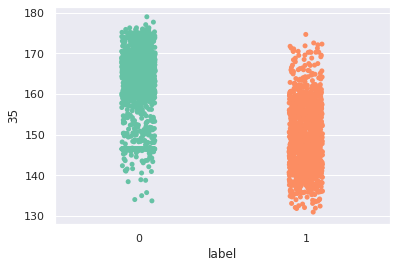

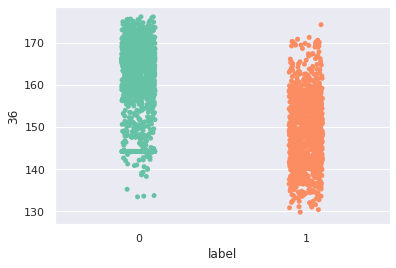

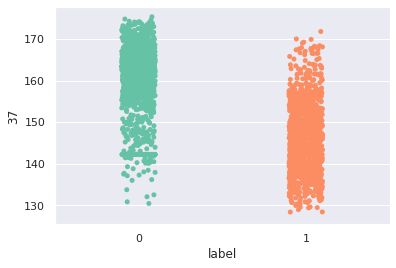

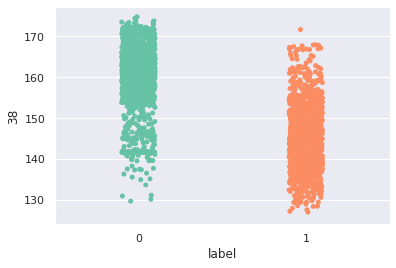

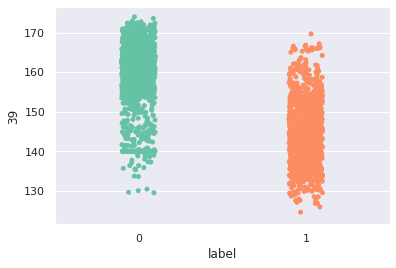

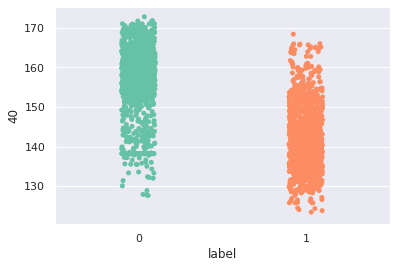

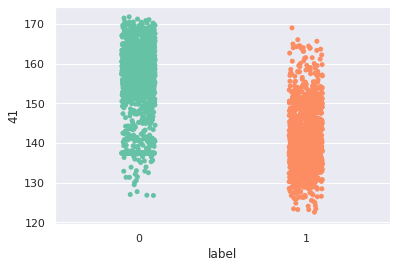

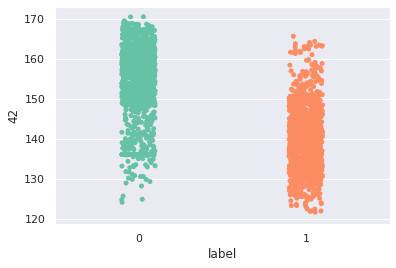

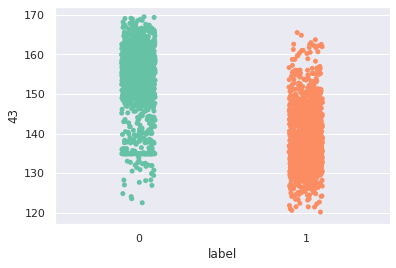

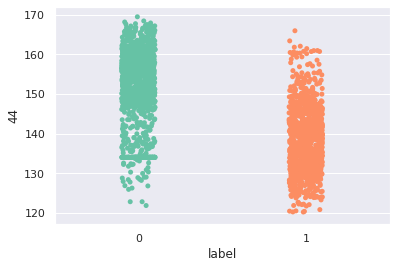

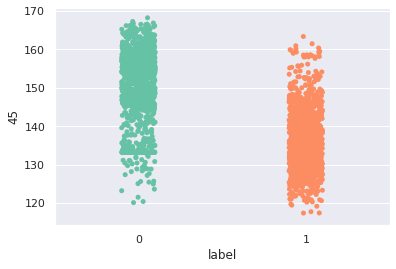

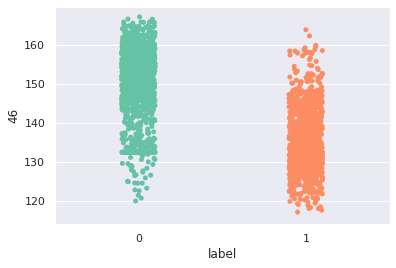

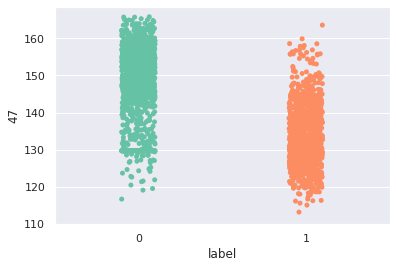

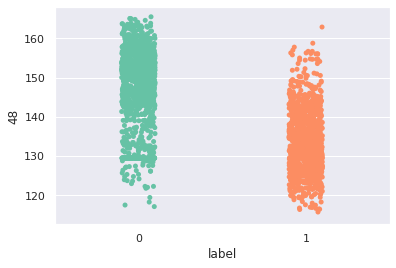

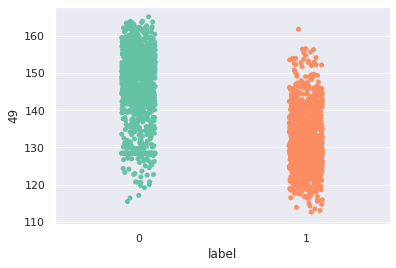

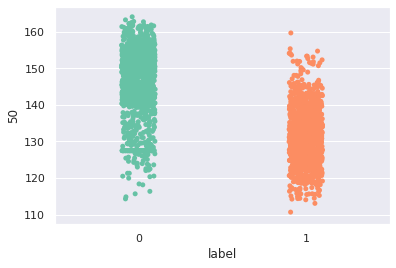

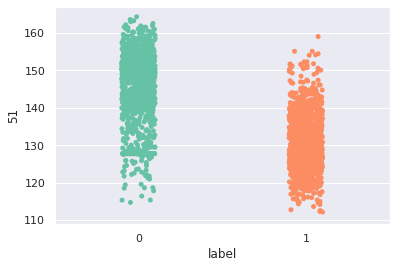

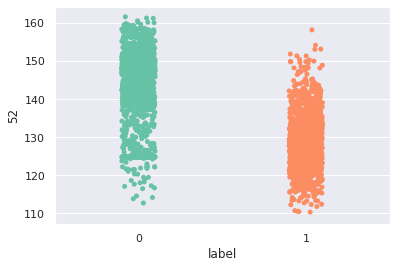

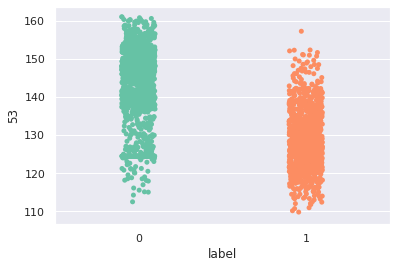

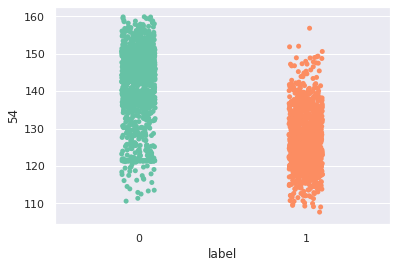

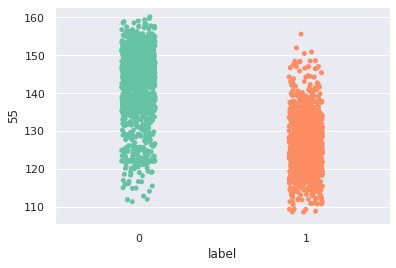

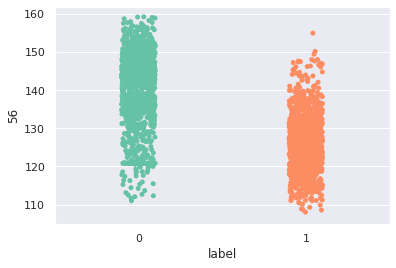

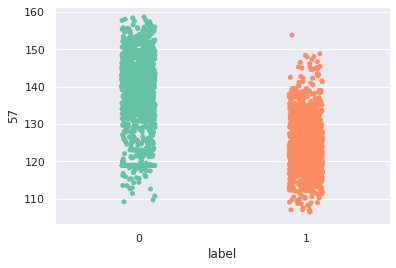

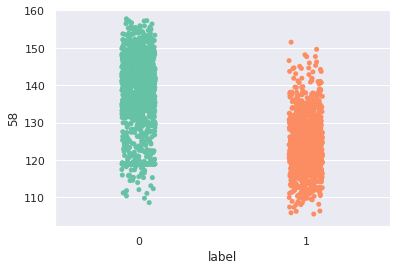

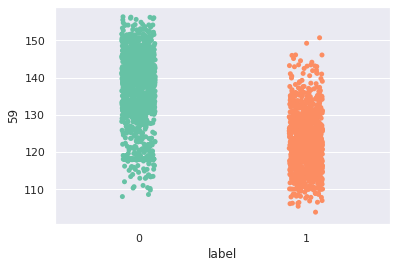

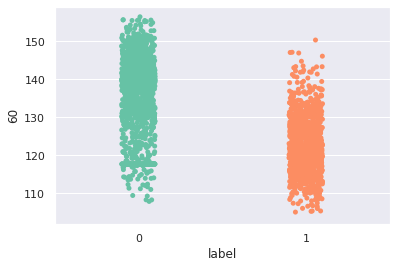

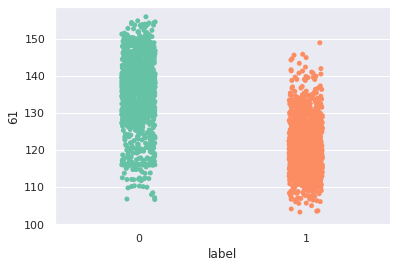

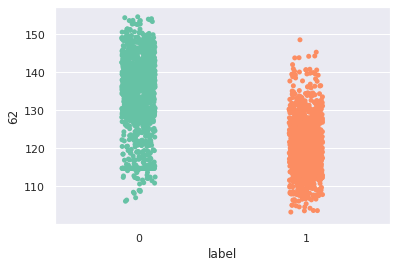

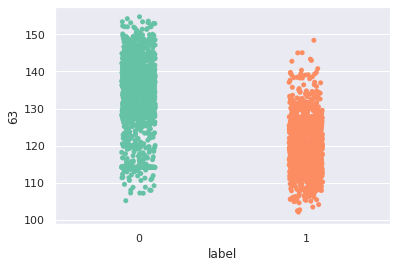

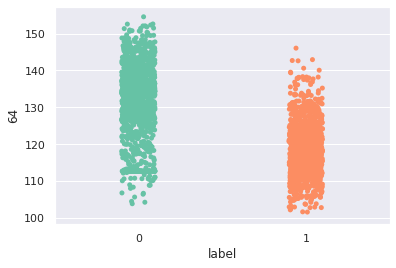

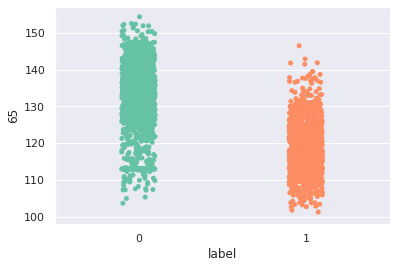

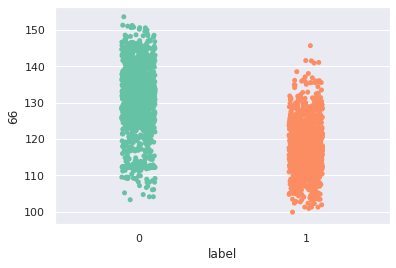

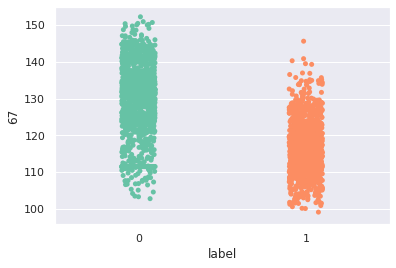

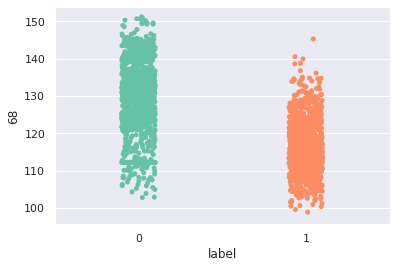

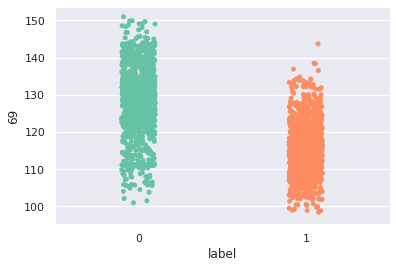

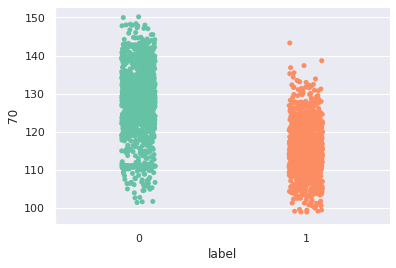

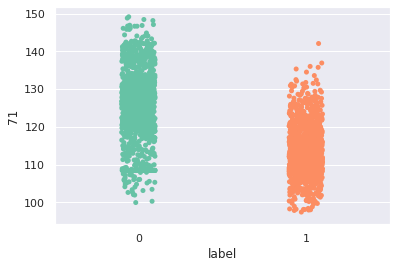

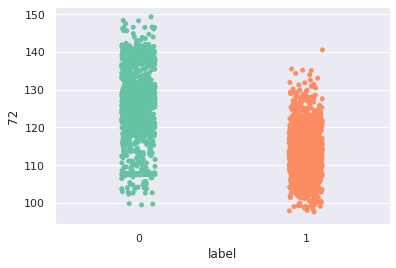

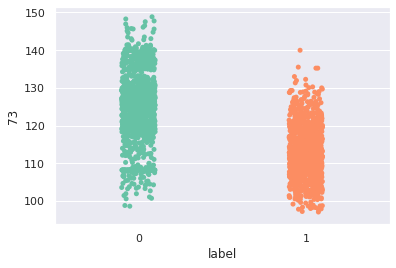

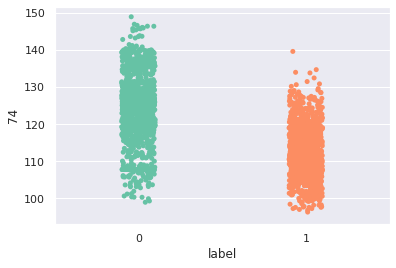

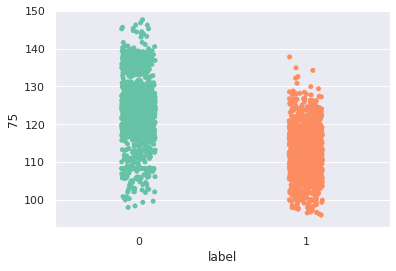

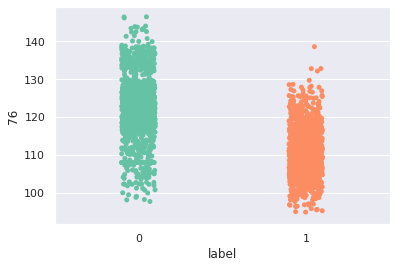

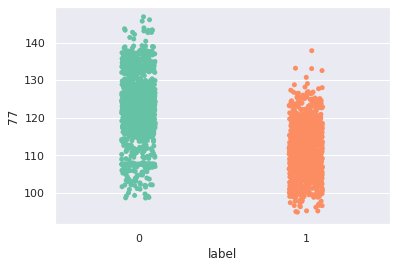

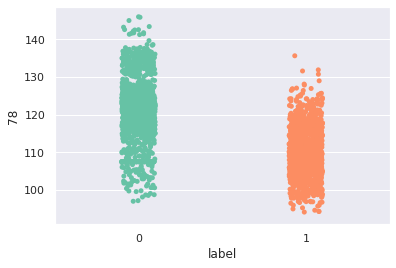

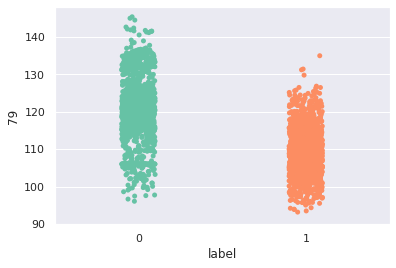

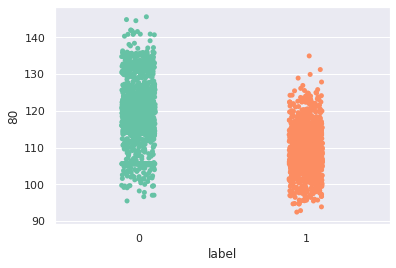

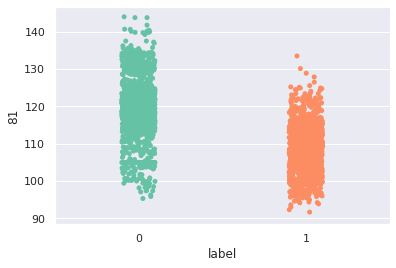

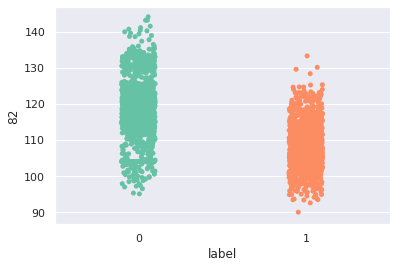

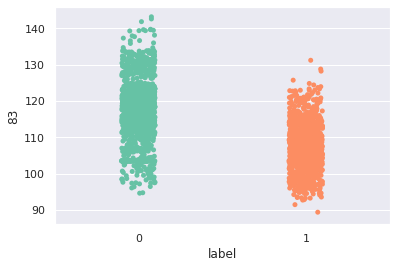

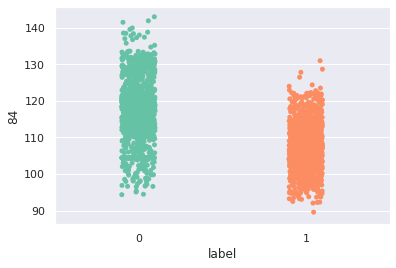

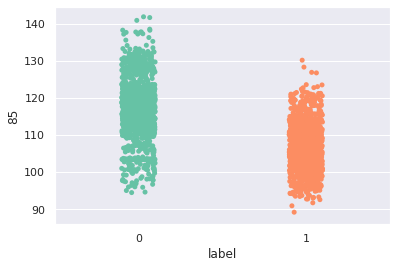

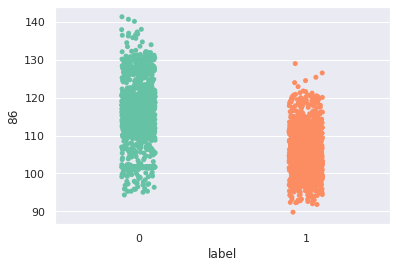

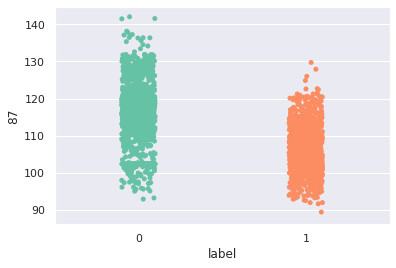

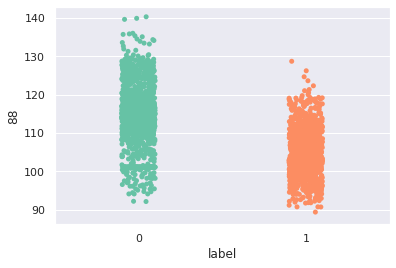

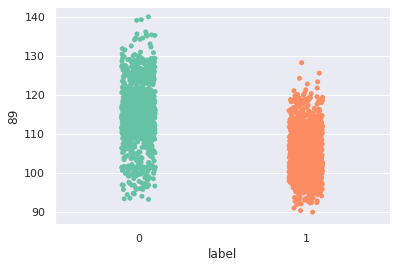

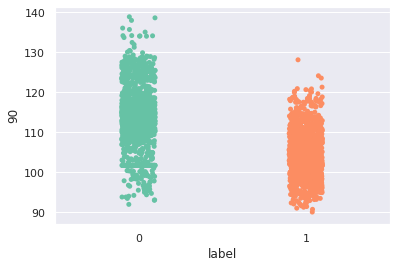

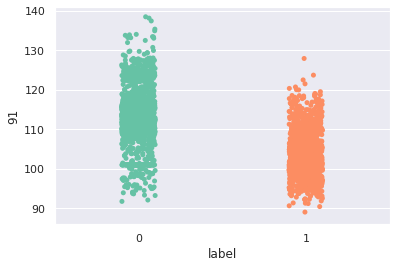

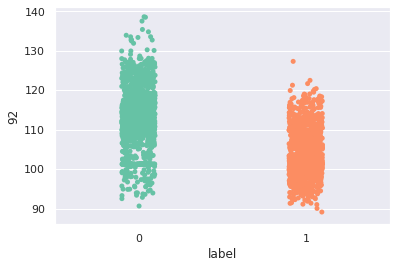

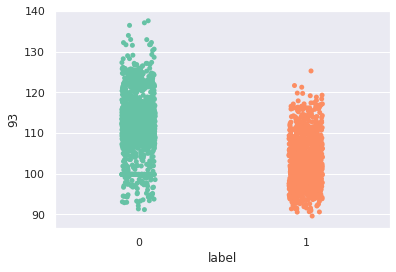

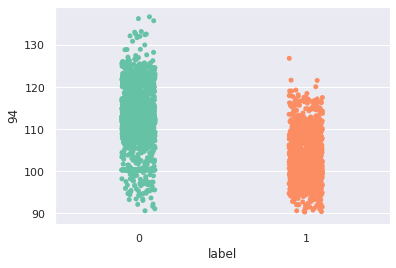

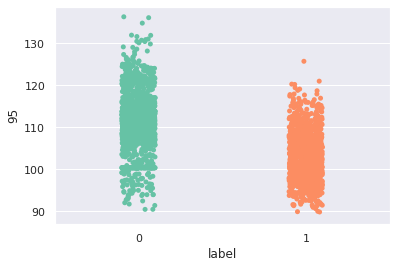

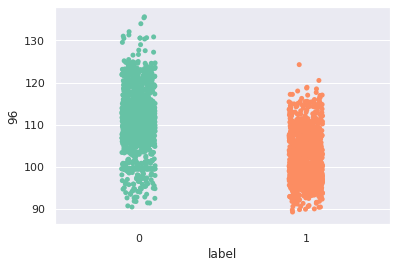

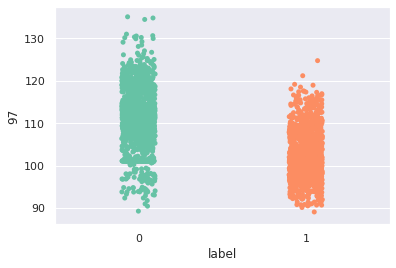

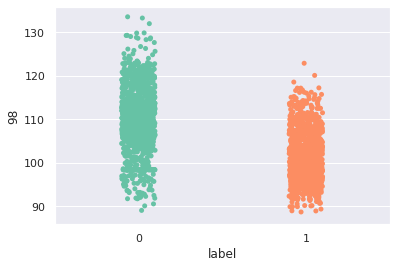

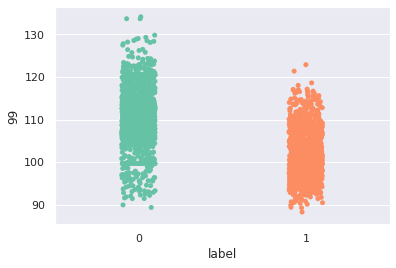

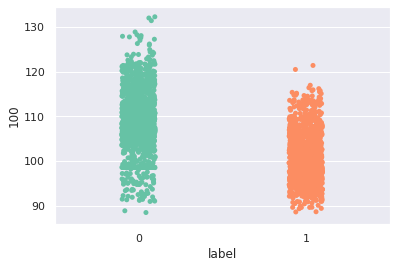

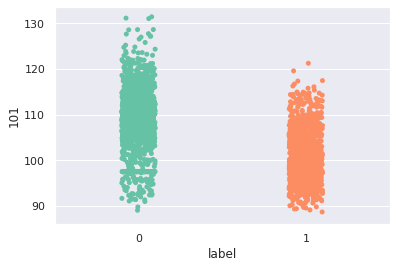

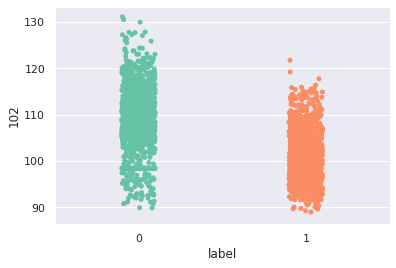

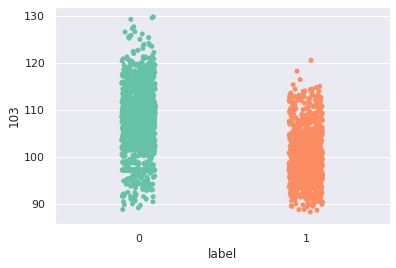

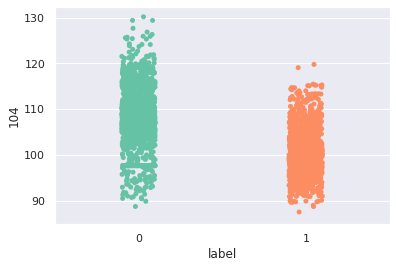

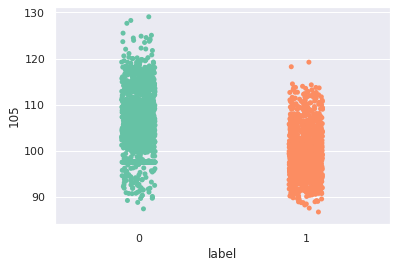

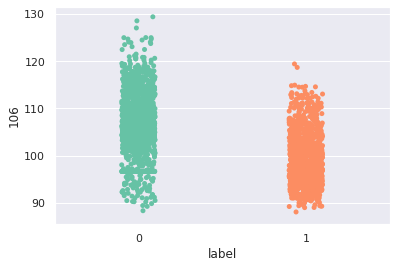

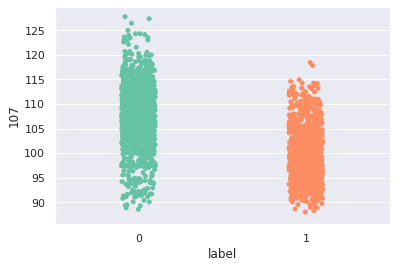

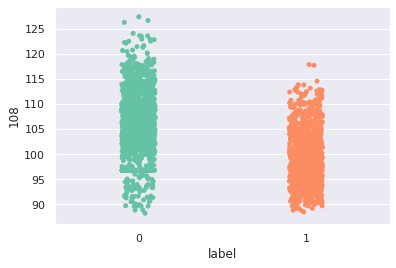

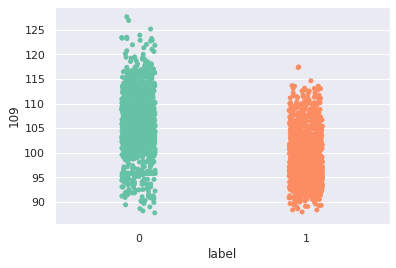

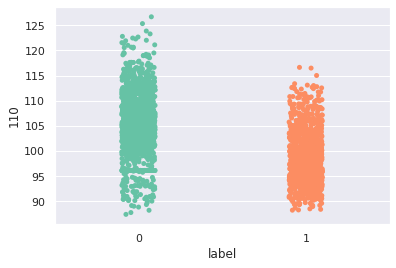

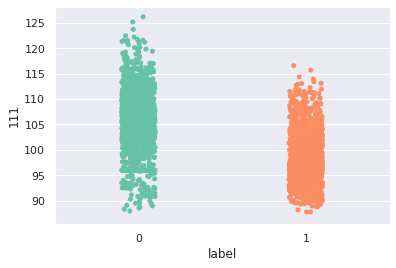

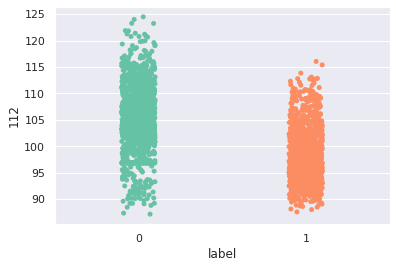

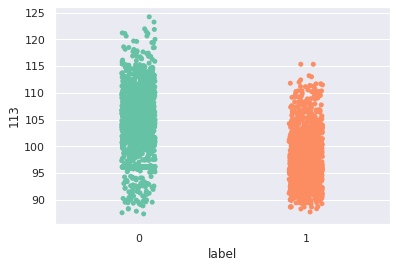

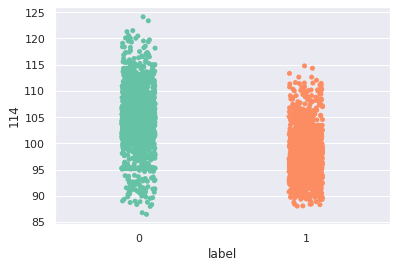

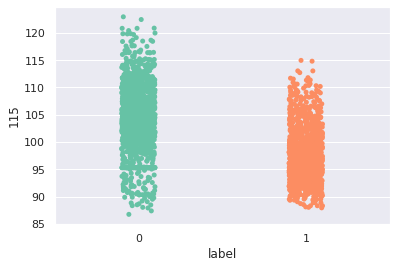

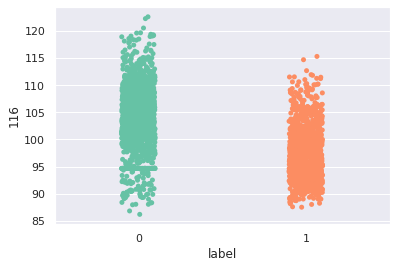

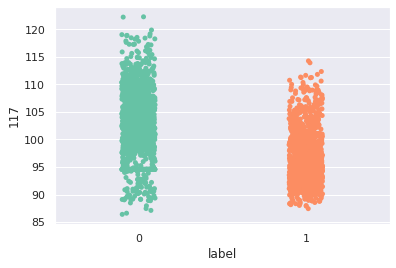

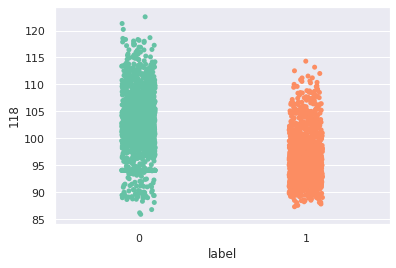

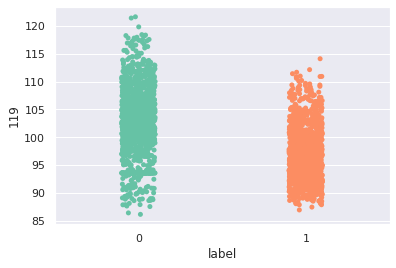

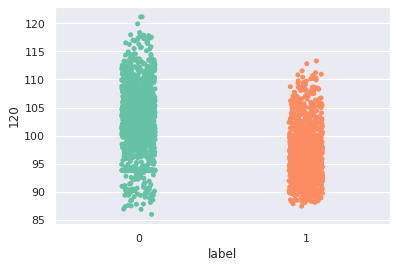

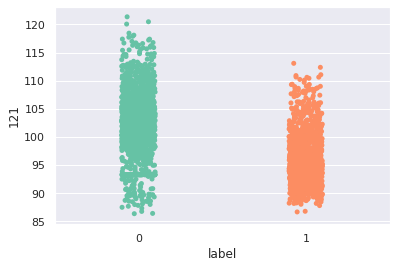

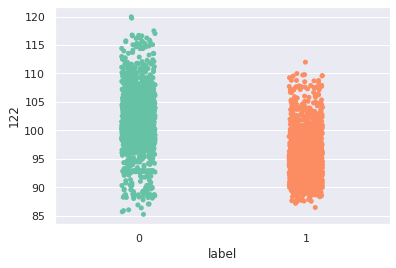

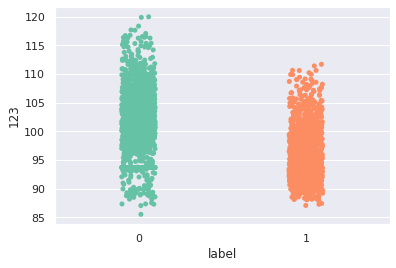

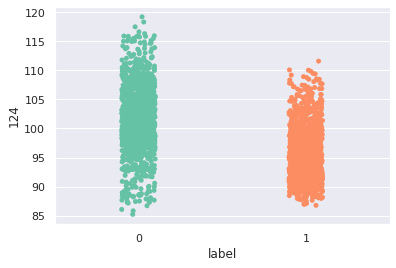

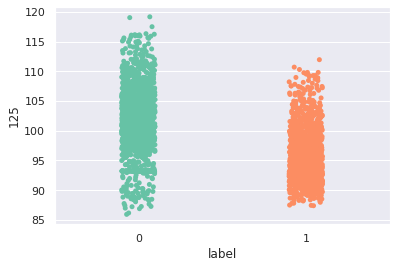

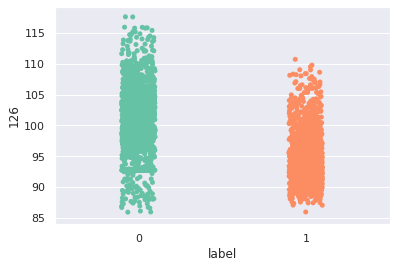

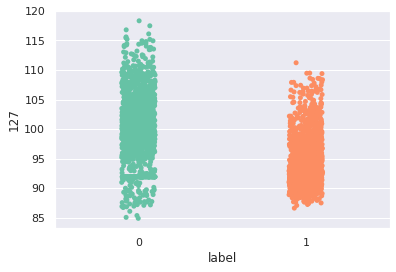

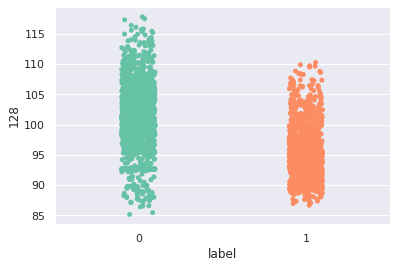

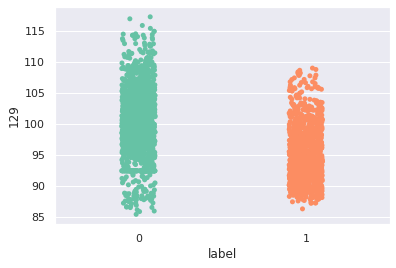

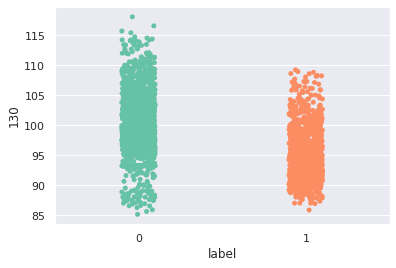

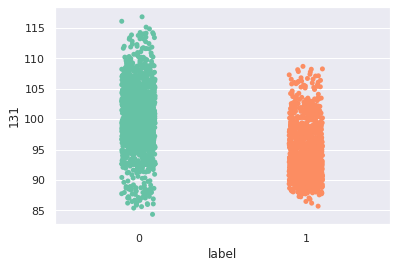

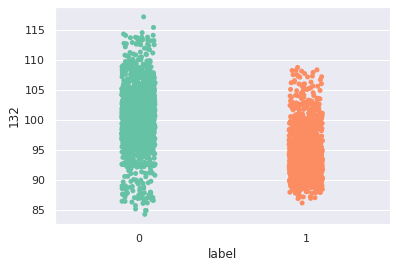

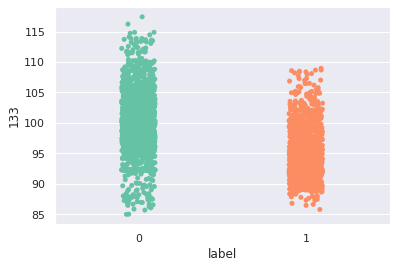

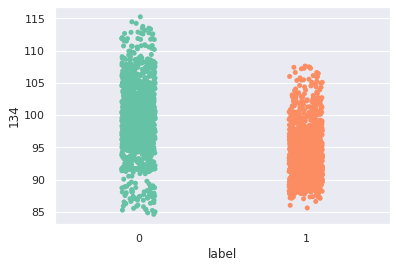

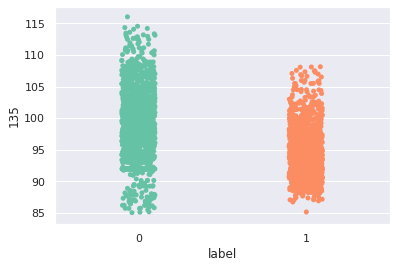

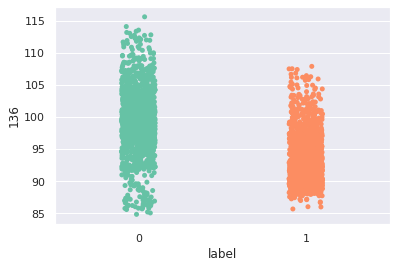

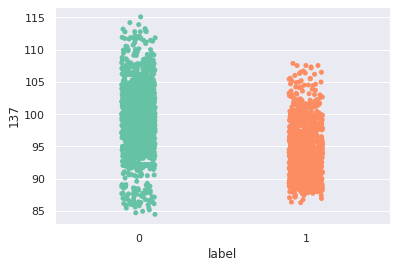

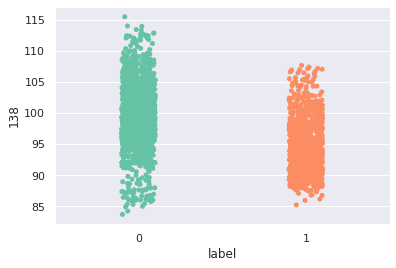

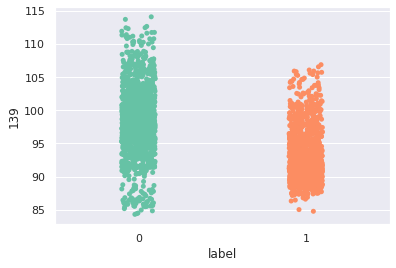

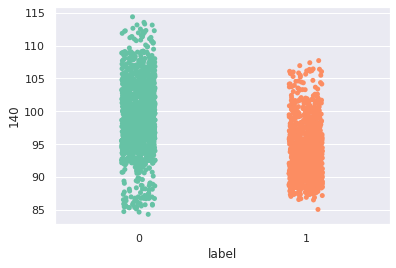

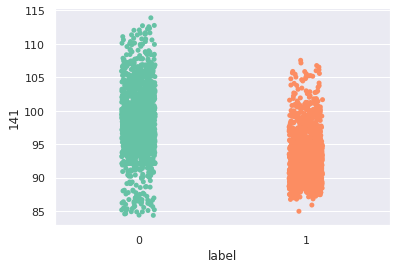

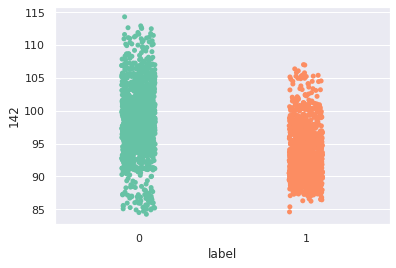

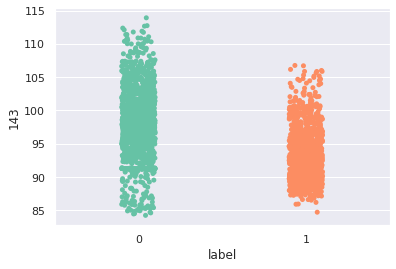

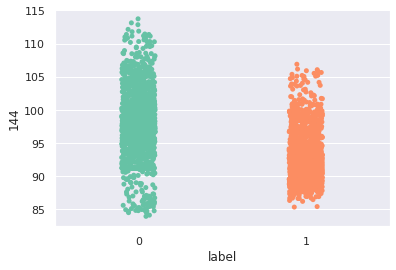

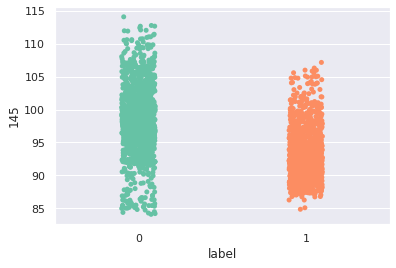

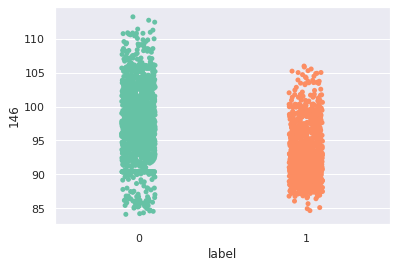

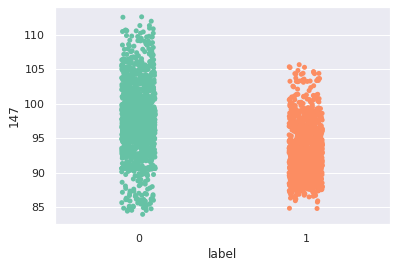

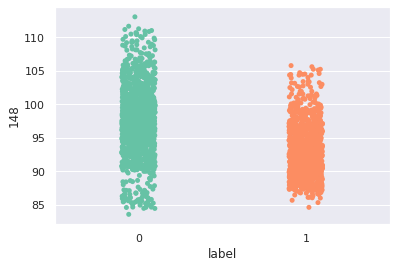

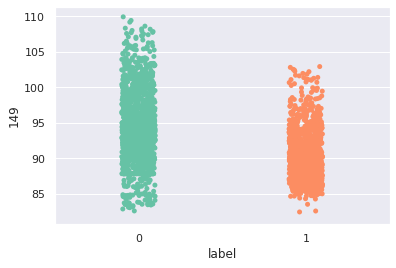

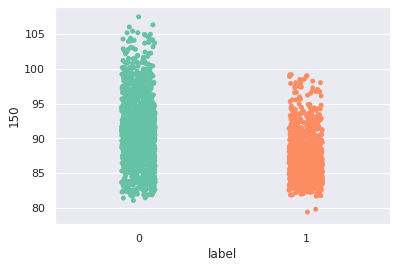

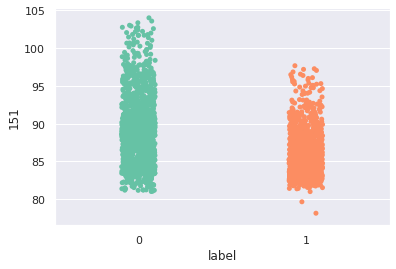

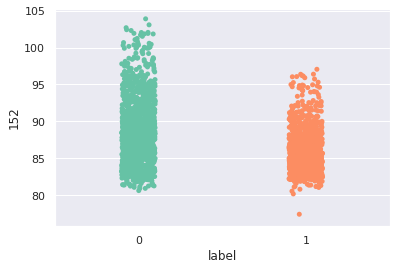

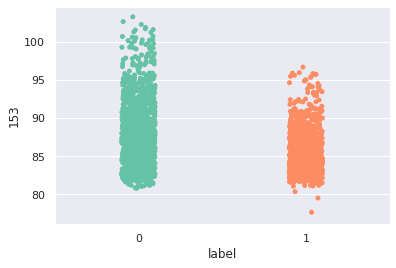

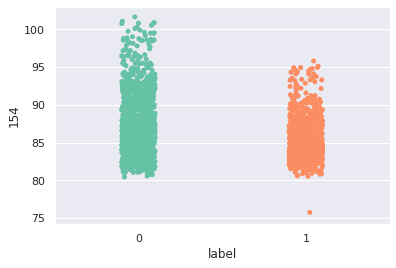

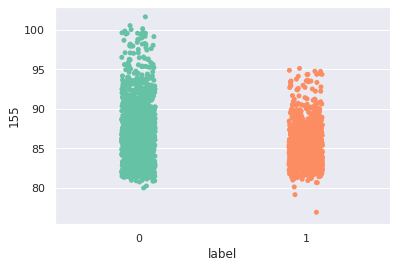

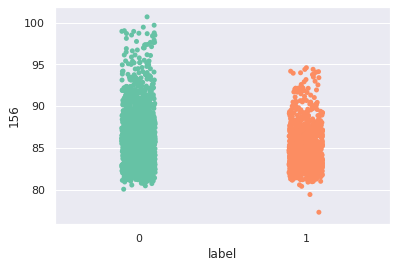

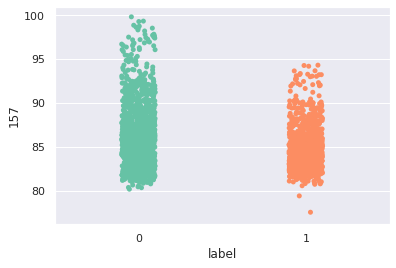

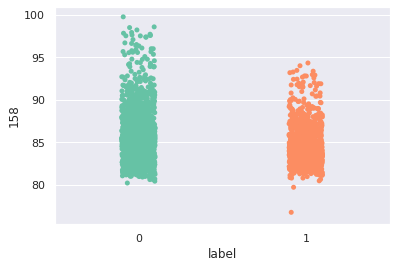

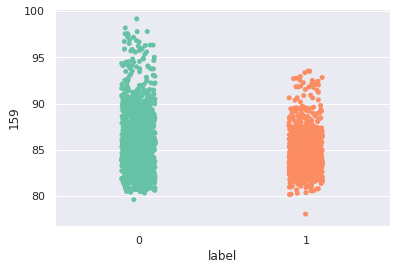

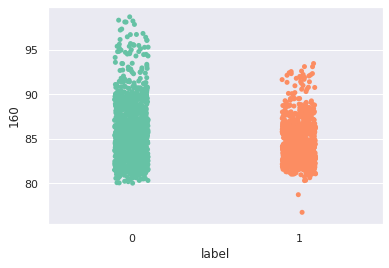

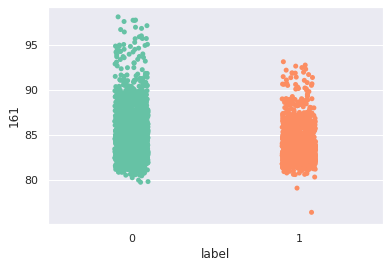

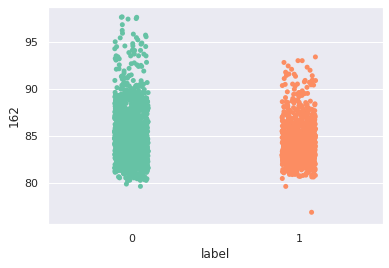

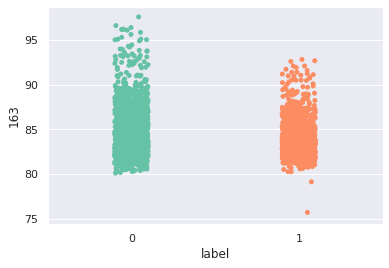

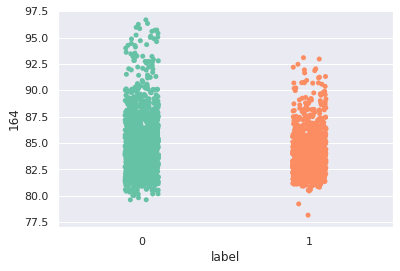

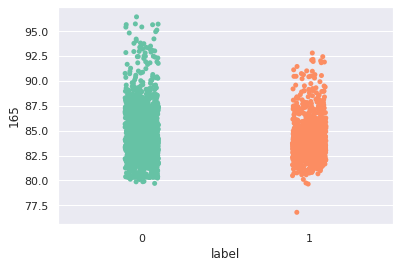

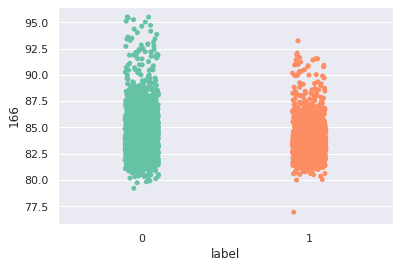

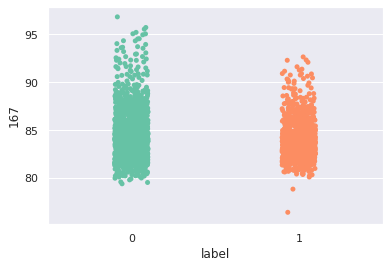

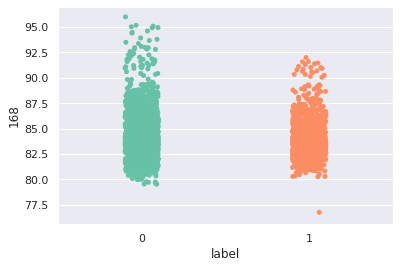

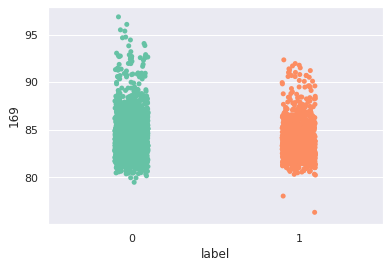

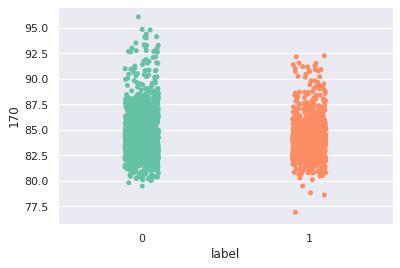

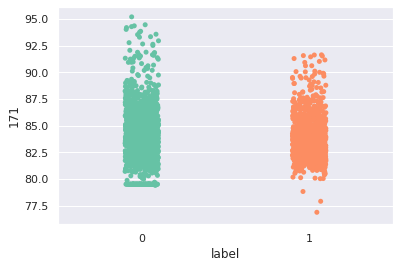

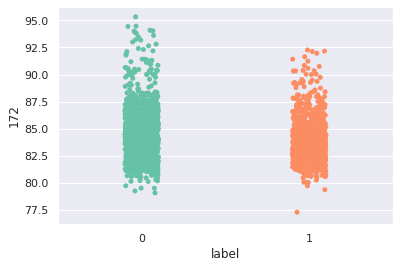

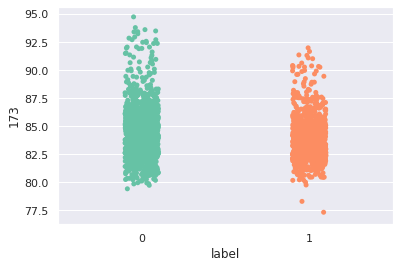

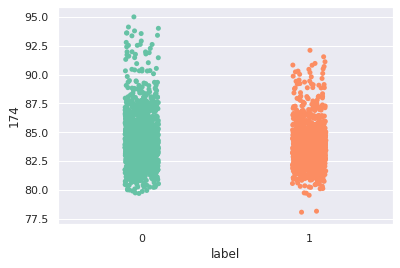

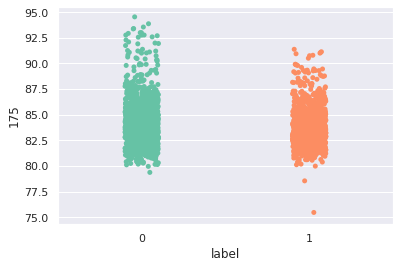

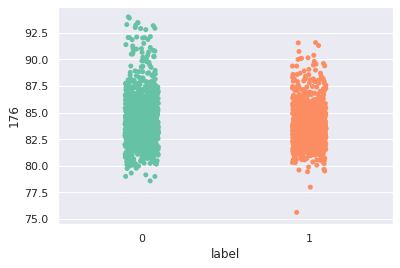

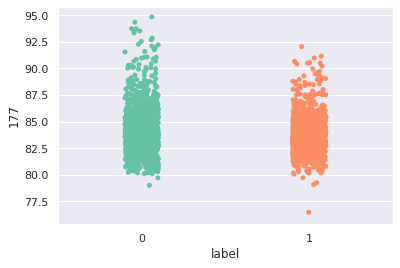

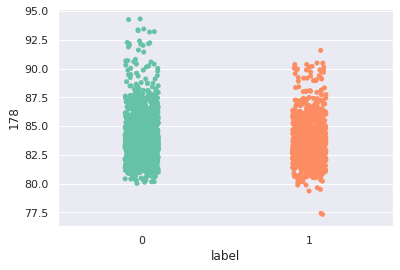

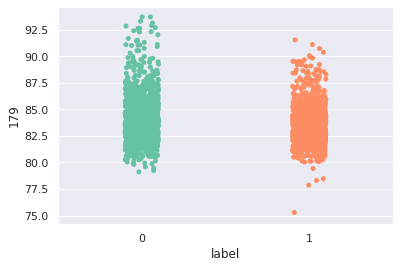

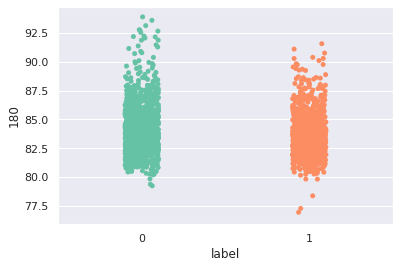

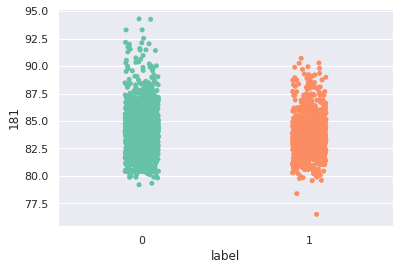

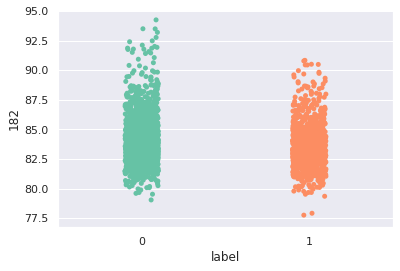

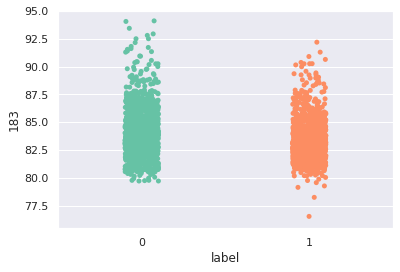

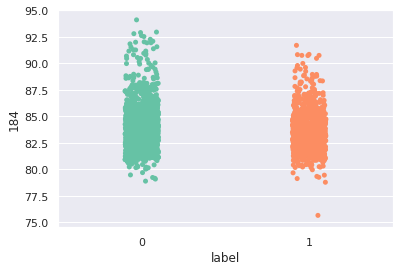

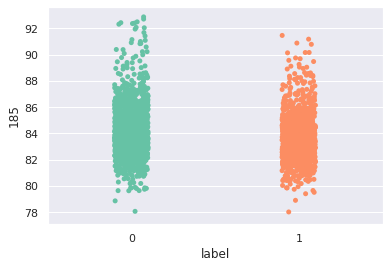

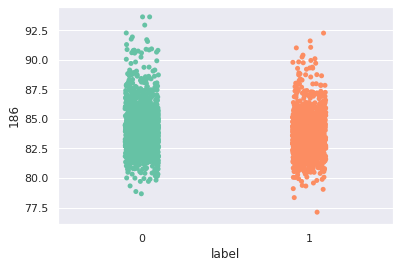

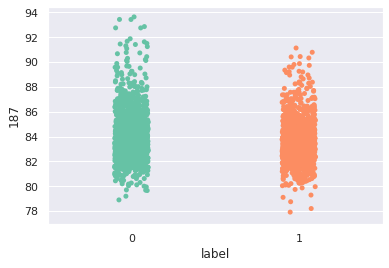

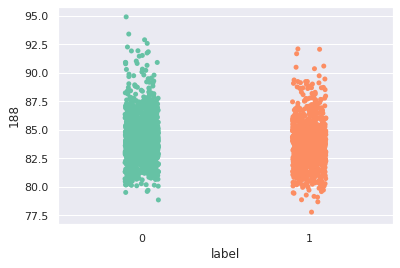

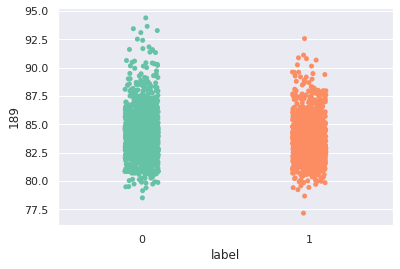

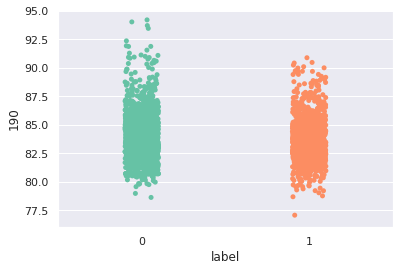

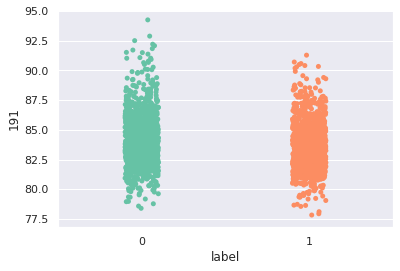

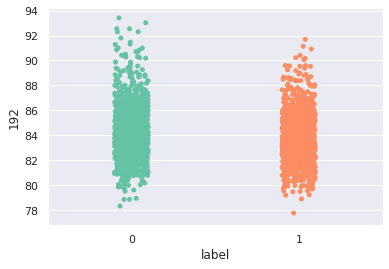

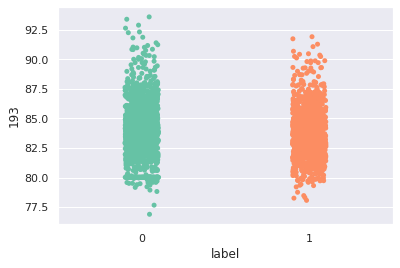

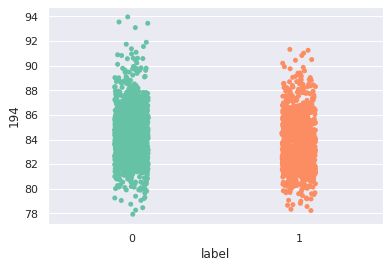

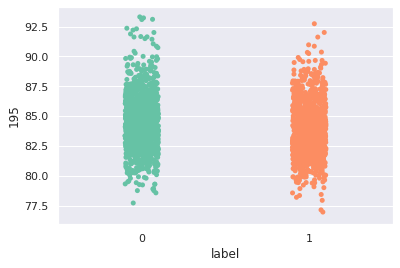

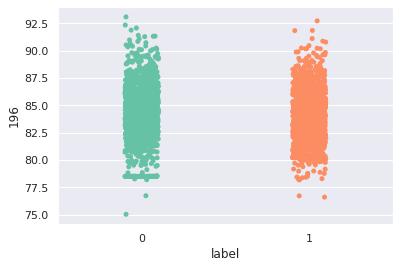

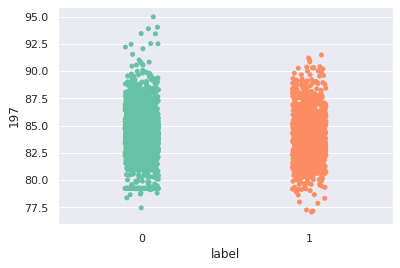

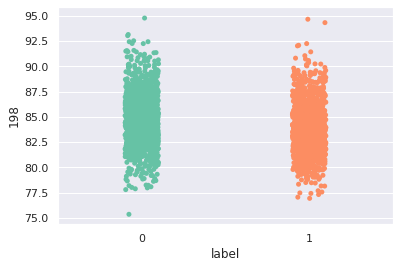

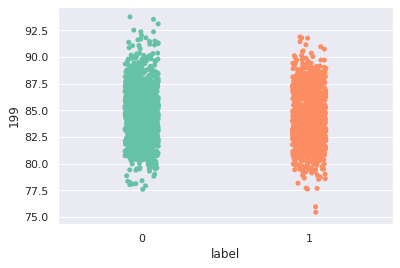

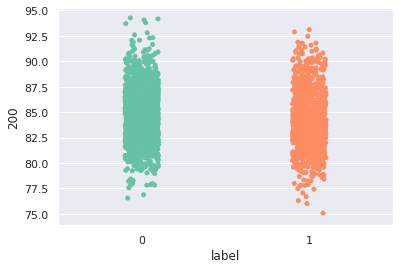

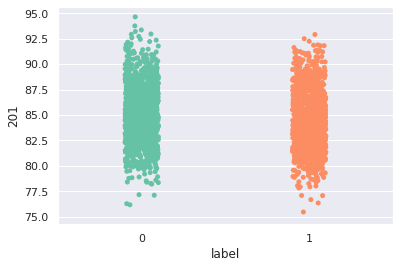

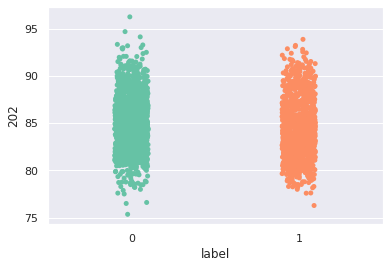

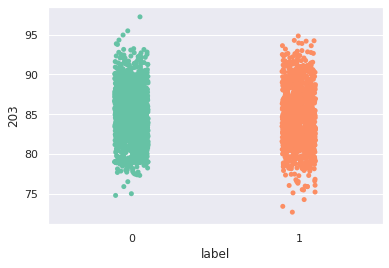

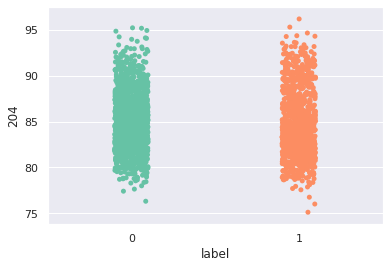

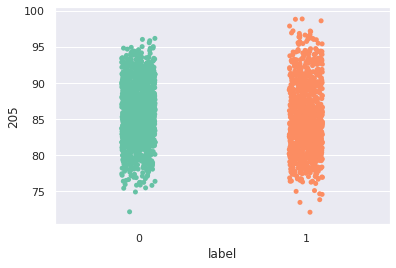

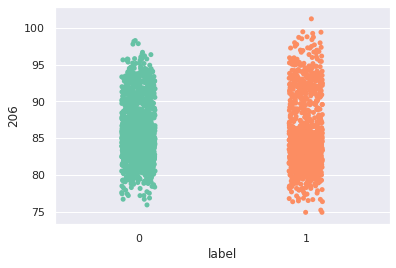

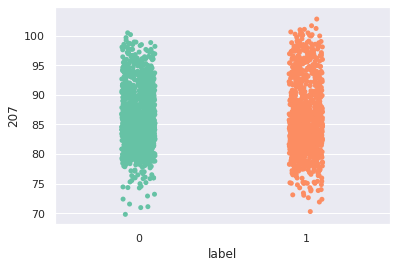

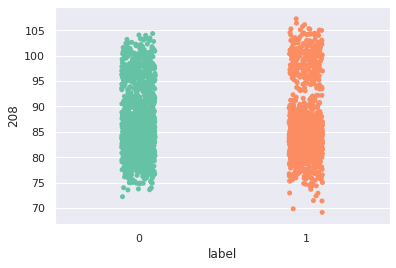

In [11]:
for i in list(data.iloc[:,1:].columns):
    plt.figure(i)
    ax = sns.stripplot(x="label", y=i, data=data,palette="Set2")

#### Clustering the Featurs

I will be dividing all the features into three different clusters and visualize them using PCA.

In [12]:
scaler = StandardScaler()

In [13]:
X = pd.DataFrame(scaler.fit_transform(data.drop('label',axis=1)))

In [14]:
kmeans = KMeans(n_clusters=3)

In [15]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
clusters = kmeans.predict(X)

In [17]:
X["Cluster"] = clusters

#### Principal Component Analysis

In [18]:
plotX = pd.DataFrame(np.array(X))

In [19]:
plotX.columns = X.columns

The first DataFrame will hold the results of the PCA algorithm with only one principal component. This DataFrame will be used to visualize our clusters in one dimension (1-D).

The second DataFrame will hold the two principal components returned by the PCA algorithm with n_components=2. This DataFrame will aid us in our visualization of these clusters in two dimensions (2-D).

And the third DataFrame will hold the results of the PCA algorithm that returns three principal components. This DataFrame will allow us to visualize the clusters in three dimensional space (3-D).

In [20]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [21]:
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [22]:
PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [23]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [24]:
plotX["dummy"] = 0

In [25]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [26]:
init_notebook_mode(connected=True)

#### 1-D Plot

In [27]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = trace, layout = layout)

iplot(fig)

#### 2-D Plot

In [28]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = trace, layout = layout)

iplot(fig)


#### 3-D Plot

In [29]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = trace, layout = layout)

iplot(fig)


### Model Building

I have gone a step higher and build an Machine Learning Model that can classify the label into 0 and 1.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [31]:
X=data.drop(['label'],axis=1)
y = data['label']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,stratify=y, random_state=10)

In [33]:
import lightgbm as lgb

params_lgb = {'num_leaves': 40,
             'scale_pos_weight':1,
          'feature_fraction': 0.95,
          'bagging_fraction': 0.81,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.015,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'random_state': 47,
         }

In [34]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid,reference=lgb_train)
gbm = lgb.train(params_lgb,lgb_train,num_boost_round=8000,valid_sets=lgb_eval,early_stopping_rounds=100)

[1]	valid_0's auc: 0.968528
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.965429
[3]	valid_0's auc: 0.968577
[4]	valid_0's auc: 0.972505
[5]	valid_0's auc: 0.973684
[6]	valid_0's auc: 0.973664
[7]	valid_0's auc: 0.972699
[8]	valid_0's auc: 0.972806
[9]	valid_0's auc: 0.973752
[10]	valid_0's auc: 0.973703
[11]	valid_0's auc: 0.974523
[12]	valid_0's auc: 0.974532
[13]	valid_0's auc: 0.974959
[14]	valid_0's auc: 0.976458
[15]	valid_0's auc: 0.976831
[16]	valid_0's auc: 0.977171
[17]	valid_0's auc: 0.977462
[18]	valid_0's auc: 0.977491
[19]	valid_0's auc: 0.977733
[20]	valid_0's auc: 0.977704
[21]	valid_0's auc: 0.977879
[22]	valid_0's auc: 0.97753
[23]	valid_0's auc: 0.977821
[24]	valid_0's auc: 0.977753
[25]	valid_0's auc: 0.977326
[26]	valid_0's auc: 0.977302
[27]	valid_0's auc: 0.976555
[28]	valid_0's auc: 0.976594
[29]	valid_0's auc: 0.977345
[30]	valid_0's auc: 0.977239
[31]	valid_0's auc: 0.977239
[32]	valid_0's auc: 0.977365
[33]	valid_0's auc: 

[297]	valid_0's auc: 0.989097
[298]	valid_0's auc: 0.989087
[299]	valid_0's auc: 0.989058
[300]	valid_0's auc: 0.989039
[301]	valid_0's auc: 0.989068
[302]	valid_0's auc: 0.989097
[303]	valid_0's auc: 0.989126
[304]	valid_0's auc: 0.989107
[305]	valid_0's auc: 0.989117
[306]	valid_0's auc: 0.989126
[307]	valid_0's auc: 0.989204
[308]	valid_0's auc: 0.989194
[309]	valid_0's auc: 0.989301
[310]	valid_0's auc: 0.98932
[311]	valid_0's auc: 0.98932
[312]	valid_0's auc: 0.98933
[313]	valid_0's auc: 0.98932
[314]	valid_0's auc: 0.989349
[315]	valid_0's auc: 0.989398
[316]	valid_0's auc: 0.989466
[317]	valid_0's auc: 0.989466
[318]	valid_0's auc: 0.989437
[319]	valid_0's auc: 0.989437
[320]	valid_0's auc: 0.989446
[321]	valid_0's auc: 0.989495
[322]	valid_0's auc: 0.989466
[323]	valid_0's auc: 0.989475
[324]	valid_0's auc: 0.989485
[325]	valid_0's auc: 0.989505
[326]	valid_0's auc: 0.989505
[327]	valid_0's auc: 0.989543
[328]	valid_0's auc: 0.989553
[329]	valid_0's auc: 0.989534
[330]	valid_0'

[572]	valid_0's auc: 0.991105
[573]	valid_0's auc: 0.991086
[574]	valid_0's auc: 0.991105
[575]	valid_0's auc: 0.991115
[576]	valid_0's auc: 0.991163
[577]	valid_0's auc: 0.991163
[578]	valid_0's auc: 0.991154
[579]	valid_0's auc: 0.991173
[580]	valid_0's auc: 0.991192
[581]	valid_0's auc: 0.991202
[582]	valid_0's auc: 0.991221
[583]	valid_0's auc: 0.991221
[584]	valid_0's auc: 0.991192
[585]	valid_0's auc: 0.991241
[586]	valid_0's auc: 0.991221
[587]	valid_0's auc: 0.991309
[588]	valid_0's auc: 0.991299
[589]	valid_0's auc: 0.991328
[590]	valid_0's auc: 0.991338
[591]	valid_0's auc: 0.991328
[592]	valid_0's auc: 0.991318
[593]	valid_0's auc: 0.991348
[594]	valid_0's auc: 0.991338
[595]	valid_0's auc: 0.991377
[596]	valid_0's auc: 0.991367
[597]	valid_0's auc: 0.991328
[598]	valid_0's auc: 0.991328
[599]	valid_0's auc: 0.991328
[600]	valid_0's auc: 0.991367
[601]	valid_0's auc: 0.991377
[602]	valid_0's auc: 0.991396
[603]	valid_0's auc: 0.991367
[604]	valid_0's auc: 0.991357
[605]	vali

[867]	valid_0's auc: 0.992308
[868]	valid_0's auc: 0.992318
[869]	valid_0's auc: 0.992327
[870]	valid_0's auc: 0.992318
[871]	valid_0's auc: 0.992327
[872]	valid_0's auc: 0.992337
[873]	valid_0's auc: 0.992337
[874]	valid_0's auc: 0.992376
[875]	valid_0's auc: 0.992366
[876]	valid_0's auc: 0.992356
[877]	valid_0's auc: 0.992356
[878]	valid_0's auc: 0.992366
[879]	valid_0's auc: 0.992356
[880]	valid_0's auc: 0.992356
[881]	valid_0's auc: 0.992376
[882]	valid_0's auc: 0.992337
[883]	valid_0's auc: 0.992366
[884]	valid_0's auc: 0.992366
[885]	valid_0's auc: 0.992347
[886]	valid_0's auc: 0.992376
[887]	valid_0's auc: 0.992376
[888]	valid_0's auc: 0.992366
[889]	valid_0's auc: 0.992366
[890]	valid_0's auc: 0.992356
[891]	valid_0's auc: 0.992337
[892]	valid_0's auc: 0.992347
[893]	valid_0's auc: 0.992347
[894]	valid_0's auc: 0.992366
[895]	valid_0's auc: 0.992366
[896]	valid_0's auc: 0.992366
[897]	valid_0's auc: 0.992395
[898]	valid_0's auc: 0.992347
[899]	valid_0's auc: 0.992337
[900]	vali

[1180]	valid_0's auc: 0.992832
[1181]	valid_0's auc: 0.992851
[1182]	valid_0's auc: 0.992851
[1183]	valid_0's auc: 0.992832
[1184]	valid_0's auc: 0.992841
[1185]	valid_0's auc: 0.992841
[1186]	valid_0's auc: 0.992832
[1187]	valid_0's auc: 0.992832
[1188]	valid_0's auc: 0.992832
[1189]	valid_0's auc: 0.992832
[1190]	valid_0's auc: 0.992822
[1191]	valid_0's auc: 0.992822
[1192]	valid_0's auc: 0.992832
[1193]	valid_0's auc: 0.992841
[1194]	valid_0's auc: 0.992832
[1195]	valid_0's auc: 0.992841
[1196]	valid_0's auc: 0.992841
[1197]	valid_0's auc: 0.992841
[1198]	valid_0's auc: 0.992841
[1199]	valid_0's auc: 0.992841
[1200]	valid_0's auc: 0.992841
[1201]	valid_0's auc: 0.992841
[1202]	valid_0's auc: 0.992841
[1203]	valid_0's auc: 0.992841
[1204]	valid_0's auc: 0.992841
[1205]	valid_0's auc: 0.992841
[1206]	valid_0's auc: 0.992851
[1207]	valid_0's auc: 0.992841
[1208]	valid_0's auc: 0.992841
[1209]	valid_0's auc: 0.992841
[1210]	valid_0's auc: 0.992832
[1211]	valid_0's auc: 0.992832
[1212]	v

[1495]	valid_0's auc: 0.993074
[1496]	valid_0's auc: 0.993074
[1497]	valid_0's auc: 0.993084
[1498]	valid_0's auc: 0.993074
[1499]	valid_0's auc: 0.993084
[1500]	valid_0's auc: 0.993084
[1501]	valid_0's auc: 0.993084
[1502]	valid_0's auc: 0.993084
[1503]	valid_0's auc: 0.993074
[1504]	valid_0's auc: 0.993074
[1505]	valid_0's auc: 0.993064
[1506]	valid_0's auc: 0.993055
[1507]	valid_0's auc: 0.993055
[1508]	valid_0's auc: 0.993055
[1509]	valid_0's auc: 0.993055
[1510]	valid_0's auc: 0.993064
[1511]	valid_0's auc: 0.993074
[1512]	valid_0's auc: 0.993064
[1513]	valid_0's auc: 0.993055
[1514]	valid_0's auc: 0.993064
[1515]	valid_0's auc: 0.993064
[1516]	valid_0's auc: 0.993064
[1517]	valid_0's auc: 0.993064
[1518]	valid_0's auc: 0.993064
[1519]	valid_0's auc: 0.993074
[1520]	valid_0's auc: 0.993074
[1521]	valid_0's auc: 0.993074
[1522]	valid_0's auc: 0.993074
[1523]	valid_0's auc: 0.993074
[1524]	valid_0's auc: 0.993074
[1525]	valid_0's auc: 0.993064
[1526]	valid_0's auc: 0.993055
[1527]	v

In [35]:
from sklearn.metrics import classification_report

pred_test = gbm.predict(X_valid)

pred_test = np.rint(pred_test)
print(classification_report(y_valid, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       363
           1       0.95      0.98      0.96       284

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



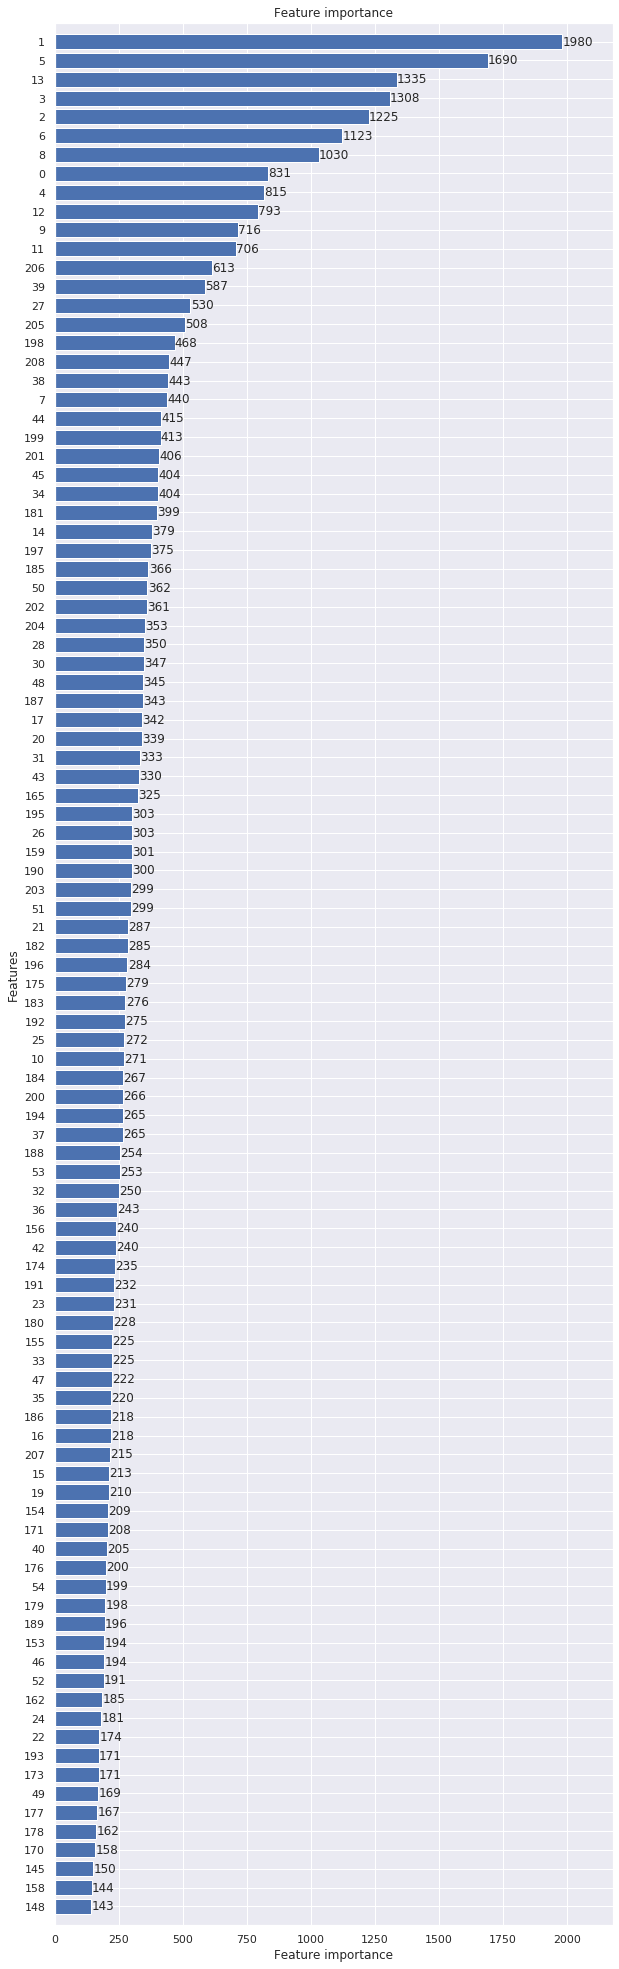

In [36]:
fig, ax = plt.subplots(figsize=(10,35))
ax = lgb.plot_importance(gbm, max_num_features=100, height=0.8, ax=ax)
plt.show()